### Develop LSTM Models For Univariate Time Series Forecasting

In [ ]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32341.3066
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 32332.2988
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 32322.9902
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 32313.3457
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 32303.3496
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 32292.9941
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 32282.2812
Epoch 8/300
1/1 [==============================] - 0s 15ms/step - loss: 32271.2031
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 32259.7402
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 32247.8652
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 32235.5156
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 32222.6094
Epo

### Predicting For the next 10 data

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[223.01144]
1 day input [196.         210.         223.01144409]
1 day output [[235.24428]]
2 day input [210.         223.01144409 235.24427795]
2 day output [[249.26353]]
3 day input [223.01144 235.24428 249.26353]
3 day output [[263.35712]]
4 day input [235.24428 249.26353 263.35712]
4 day output [[277.8473]]
5 day input [249.26353 263.35712 277.8473 ]
5 day output [[293.37323]]
6 day input [263.35712 277.8473  293.37323]
6 day output [[309.46945]]
7 day input [277.8473  293.37323 309.46945]
7 day output [[326.3333]]
8 day input [293.37323 309.46945 326.3333 ]
8 day output [[344.14902]]
9 day input [309.46945 326.3333  344.14902]
9 day output [[362.82587]]
[223.01144, 235.24428, 249.26353, 263.35712, 277.8473, 293.37323, 309.46945, 326.3333, 344.14902, 362.82587]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)

9

In [ ]:
lst_output

[98.499565,
 117.77383,
 91.110756,
 54.836514,
 60.205837,
 41.080276,
 30.803324,
 28.267427,
 18.727669,
 13.9965725]

### Visualizaing The Output

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

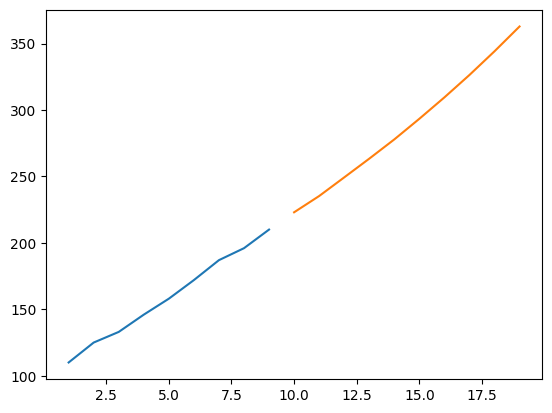

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
